# 1

In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve,convolve2d
import math


In [2]:
vidcap = cv2.VideoCapture('video.mp4')
success,image = vidcap.read()
count = 0
while success:
    success,image = vidcap.read()
    if count%30==0 :
        image = cv2.flip(image, -1)
        cv2.imwrite(r"C:/Users/swath/OneDrive/Desktop/CV/Assignment_03/data/frame%d.jpg" % count, image)     # save frame as JPEG file      
        print('Read a new frame: ', success)
    count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True


In [3]:
def ssd(A,B):
    squares = (A[:,:,:3] - B[:,:,:3]) ** 2
    return math.sqrt(np.sum(squares))

In [4]:
def norm_data(data):
    mean_data=np.mean(data)
    std_data=np.std(data, ddof=1)
    return (data-mean_data)/(std_data)


def ncc(data0, data1):
    return (1.0/(data0.size-1)) * np.sum(norm_data(data0)*norm_data(data1))

In [5]:
import cv2

imdir = r'C:/Users/swath/OneDrive/Desktop/CV/Assignment_03/data/'

files = []
files.extend(glob.glob(imdir + '*.' + 'jpg'))

images = [cv2.imread(file) for file in files]
print(files)

['C:/Users/swath/OneDrive/Desktop/CV/Assignment_03/data\\frame0.jpg', 'C:/Users/swath/OneDrive/Desktop/CV/Assignment_03/data\\frame1.jpg', 'C:/Users/swath/OneDrive/Desktop/CV/Assignment_03/data\\frame10.jpg', 'C:/Users/swath/OneDrive/Desktop/CV/Assignment_03/data\\frame11.jpg', 'C:/Users/swath/OneDrive/Desktop/CV/Assignment_03/data\\frame12.jpg', 'C:/Users/swath/OneDrive/Desktop/CV/Assignment_03/data\\frame120.jpg', 'C:/Users/swath/OneDrive/Desktop/CV/Assignment_03/data\\frame13.jpg', 'C:/Users/swath/OneDrive/Desktop/CV/Assignment_03/data\\frame14.jpg', 'C:/Users/swath/OneDrive/Desktop/CV/Assignment_03/data\\frame15.jpg', 'C:/Users/swath/OneDrive/Desktop/CV/Assignment_03/data\\frame150.jpg', 'C:/Users/swath/OneDrive/Desktop/CV/Assignment_03/data\\frame180.jpg', 'C:/Users/swath/OneDrive/Desktop/CV/Assignment_03/data\\frame2.jpg', 'C:/Users/swath/OneDrive/Desktop/CV/Assignment_03/data\\frame210.jpg', 'C:/Users/swath/OneDrive/Desktop/CV/Assignment_03/data\\frame240.jpg', 'C:/Users/swath/O

(640, 352, 3)


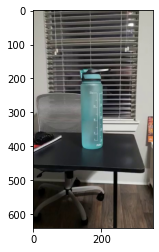

In [6]:
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
print(images[0].shape)

True

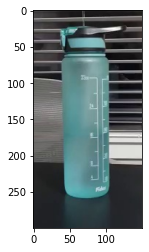

In [7]:
cropped_image = images[0][150:450,100:250]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

cv2.imwrite("Cropped Image.jpg", cropped_image)

In [8]:
d=dict()
d_norm=dict()
for i in range(0,340,20):
    for j in range(0,202,20):
        d[str(i)+":"+str(i+300),str(j)+":"+str(j+150)]=ssd(cropped_image,images[12][i:i+300,j:j+150])

In [9]:
a=min(d.items(), key=lambda x: x[1])
y1,y2=map(int,a[0][0].split(':'))
x1,x2=map(int,a[0][1].split(':'))

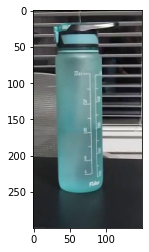

In [10]:
plt.imshow(cv2.cvtColor(images[12][y1:y2,x1:x2], cv2.COLOR_BGR2RGB))

In [11]:
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2
  
# Using cv2.rectangle() method
# Draw a rectangle with blue line borders of thickness of 2 px
image = cv2.rectangle(images[12], (x1,y1), (x2,y2), color, thickness)

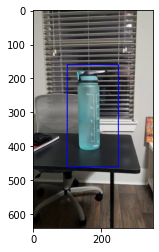

In [12]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 2A

In [13]:
Iref=cv2.imread(r'C:/Users/swath/OneDrive/Desktop/CV/Assignment_03/data/frame0.jpg',cv2.IMREAD_GRAYSCALE)
Inext=cv2.imread(r'C:/Users/swath/OneDrive/Desktop/CV/Assignment_03/data/frame30.jpg',cv2.IMREAD_GRAYSCALE)
Iref=np.array(Iref).astype(np.float32)
Inext=np.array(Inext).astype(np.float32)
kernel_x = np.array([[-1., 1.], [-1., 1.]])*.25
kernel_y = np.array([[-1., -1.], [1., 1.]])*.25
kernel_t = np.array([[1., 1.], [1., 1.]])*.25
Iref = Iref / 255. # normalize pixels
Inext = Inext / 255. # normalize pixels
Ix=cv2.filter2D(Iref,-1,kernel=kernel_x)
Iy=cv2.filter2D(Iref,-1,kernel=kernel_y)
It=cv2.filter2D(Iref,-1,kernel=kernel_t)+cv2.filter2D(Inext,-1,kernel=kernel_x)
Ix,Iy,It=np.array(Ix),np.array(Iy),np.array(It)

In [14]:
u=np.divide(It,np.sqrt(np.square(Ix)+np.square(Iy)))

C:\Users\swath\AppData\Local\Temp\ipykernel_14580\3143559099.py:1: RuntimeWarning: divide by zero encountered in true_divide
  u=np.divide(It,np.sqrt(np.square(Ix)+np.square(Iy)))
C:\Users\swath\AppData\Local\Temp\ipykernel_14580\3143559099.py:1: RuntimeWarning: invalid value encountered in true_divide
  u=np.divide(It,np.sqrt(np.square(Ix)+np.square(Iy)))


In [15]:
u

array([[       inf,        inf,        inf, ...,        inf,        inf,
               inf],
       [       inf,        inf,        inf, ...,        inf,        inf,
               inf],
       [       inf,        inf,        inf, ...,        inf,        inf,
               inf],
       ...,
       [43.500004 , 42.500004 ,        inf, ..., 14.900281 , 42.53264  ,
        20.172318 ],
       [62.93251  , 60.104084 , 60.104084 , ..., 37.166668 , 19.787699 ,
         7.9271812],
       [46.000004 , 44.000004 , 31.112701 , ..., 31.112717 , 11.668914 ,
         5.417139 ]], dtype=float32)

# 2B

In [16]:
import cv2
import numpy as np
 
def image_registraion(align,ref):

# Open the image files.
  img1_color = align  # Image to be aligned.
  img2_color = ref    # Reference image.
  
  # Convert to grayscale.
  img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY)
  img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY)
  height, width = img2.shape
  
  # Create ORB detector with 5000 features.
  orb_detector = cv2.ORB_create(5000)
  
  # Find keypoints and descriptors.
  # The first arg is the image, second arg is the mask
  #  (which is not required in this case).
  kp1, d1 = orb_detector.detectAndCompute(img1, None)
  kp2, d2 = orb_detector.detectAndCompute(img2, None)
  
  # Match features between the two images.
  # We create a Brute Force matcher with
  # Hamming distance as measurement mode.
  matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
  
  # Match the two sets of descriptors.
  matches = matcher.match(d1, d2)
  
  # Sort matches on the basis of their Hamming distance.
  matches=sorted(matches,key = lambda x: x.distance)
  
  # Take the top 90 % matches forward.
  matches = matches[:int(len(matches)*0.9)]
  no_of_matches = len(matches)
  
  # Define empty matrices of shape no_of_matches * 2.
  p1 = np.zeros((no_of_matches, 2))
  p2 = np.zeros((no_of_matches, 2))
  
  for i in range(len(matches)):
    p1[i, :] = kp1[matches[i].queryIdx].pt
    p2[i, :] = kp2[matches[i].trainIdx].pt
  
  # Find the homography matrix.
  homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC)
  
  # Use this matrix to transform the
  # colored image wrt the reference image.
  transformed_img = cv2.warpPerspective(img1_color,
                      homography, (width, height))
  return transformed_img

In [ ]:
import cv2 as cv
import numpy as np

#The video feed is read in as
#a VideoCapture object
cap = cv.VideoCapture("video.mp4")
ret, first_frame = cap.read()
prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)
mask = np.zeros_like(first_frame)
mask[..., 1] = 255

while(cap.isOpened()):

    ret, frame = cap.read()
    
    # Opens a new window and displays the input
    # frame
    cv.imshow("input", frame)
    
    # Converts each frame to grayscale - we previously
    # only converted the first frame to grayscale
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    # Calculates dense optical flow by Farneback method
    flow = cv.calcOpticalFlowFarneback(prev_gray, gray,None,0.5, 3, 15, 3, 5, 1.2, 0)

    # Computes the magnitude and angle of the 2D vectors
    magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])
    # Sets image hue according to the optical flow
    # direction
    mask[..., 0] = angle * 180 / np.pi / 2
    
    # Sets image value according to the optical flow
    # magnitude (normalized)
    mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
    
    # Converts HSV to RGB (BGR) color representation
    rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR)
    
    # Opens a new window and displays the output frame
    cv.imshow("dense optical flow", rgb)
    # Updates previous frame
    prev_gray = gray
    
    # Frames are read by intervals of 1 millisecond. The
    # programs breaks out of the while loop when the
    # user presses the 'q' key
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

# The following frees up resources and
# closes all windows
cap.release()
cv.destroyAllWindows()

# 3

In [18]:
import cv2 as cv2
import numpy as np
def optical_flow(n):
    cap = cv2.VideoCapture("video.mp4")
    feature_params = dict( maxCorners = 100,
                        qualityLevel = 0.3,
                        minDistance = 7,
                        blockSize = 7 )
    # Parameters for lucas kanade optical flow
    lk_params = dict( winSize  = (15, 15),
                    maxLevel = 2,
                    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
    # Create some random colors
    color = np.random.randint(0, 255, (100, 3))
    # Take first frame and find corners in it
    ret, old_frame = cap.read()
    old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
    p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
    # Create a mask image for drawing purposes
    mask = np.zeros_like(old_frame)

    count=0
    while(1):
        ret, frame = cap.read()
        count+=1
        if not ret:
            print('No frames grabbed!')
            break
        if(count%n==0):
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            # calculate optical flow
            p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
            # Select good points
            if p1 is not None:
                good_new = p1[st==1]
                good_old = p0[st==1]
            # draw the tracks
            for i, (new, old) in enumerate(zip(good_new, good_old)):
                a, b = new.ravel()
                c, d = old.ravel()
                mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
                frame = cv2.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
            img = cv2.add(frame, mask)
            img=cv2.flip(img,-1)
            cv2.imshow('frame', img)
            if cv2.waitKey(1)==ord('q'):
                break
            # Now update the previous frame and previous points
            old_gray = frame_gray.copy()
            p0 = good_new.reshape(-1, 1, 2)
    cv2.destroyAllWindows()

In [19]:
optical_flow(1)

No frames grabbed!


In [20]:
optical_flow(11)

No frames grabbed!


In [21]:
optical_flow(31)

No frames grabbed!


# 4

In [22]:
import cv2 as cv
import math as math
import numpy as np
org=cv.imread(r'C:/Users/swath/OneDrive/Desktop/CV/Assignment_03/windows.jpg')
ref=cv.imread(r'C:/Users/swath/OneDrive/Desktop/CV/Assignment_03/crop_window.jpg')
org = cv.cvtColor(org, cv.COLOR_BGR2GRAY)
ref=cv.cvtColor(ref, cv.COLOR_BGR2GRAY)
print(ref.shape)
print(org.shape)

(249, 116)
(418, 626)


In [23]:
def sum_squ_dis(cropped,orginal):
    squares = (cropped[:,:] - orginal[:,:]) ** 2
    return math.sqrt(np.sum(squares))

In [24]:
d=dict()
d_norm=dict()
for i in range(0,169,20):
    for j in range(0,510,20):
        d[str(i)+":"+str(i+249),str(j)+":"+str(j+116)]=sum_squ_dis(ref,org[i:i+249,j:j+116])
        #d_norm[str(i)+":"+str(i+100),str(j)+":"+str(j+100)]=ncc(norm_data(cropped_image),norm_data(images[0][i:i+100,j:j+100]))

In [25]:
a=sorted(d.items(), key=lambda x: x[1])

In [26]:
#print(d.items())
a=min(d.items(), key=lambda x: x[1])
y1,y2=map(int,a[0][0].split(':'))
x1,x2=map(int,a[0][1].split(':'))

In [27]:
color = (0, 255, 0)
thickness = 2
print(x1,y1)
image = cv.rectangle(org, (x1,y1), (x2,y2), color, thickness)
image=cv.rectangle(org, (800,120), (1240,730), color, thickness)
cv.putText(image, 'window', (x1+30, y1+30), cv.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
cv.putText(image, 'window', (810, 110), cv.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

400 80


array([[ 34,  27,  40, ..., 239, 239, 238],
       [ 66,  44,  27, ..., 239, 236, 235],
       [ 99,  72,  36, ..., 239, 237, 236],
       ...,
       [ 21,  22,  25, ..., 112, 158, 121],
       [ 30,  26,  23, ..., 100,  81,  79],
       [ 34,  31,  27, ...,  96, 159,  80]], dtype=uint8)

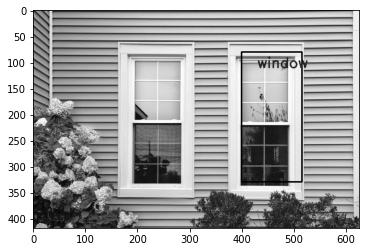

In [28]:
import matplotlib.pyplot as plt
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

# 5

In [ ]:
import os
import time
import cv2
import imutils
detectorPaths = {
    
    "face": r"C:/Users/swath/OneDrive/Desktop/CV/Assignment_03/face.xml",
}

print("[INFO] loading haar cascades...")
detectors = dict()
 
for (name, path) in detectorPaths.items():
    print(name,path)
    detectors[name] = cv2.CascadeClassifier(path)

print("[INFO] starting video stream...")
vs = cv2.VideoCapture(0)

while True:
    _,frame = vs.read()
    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faceRects = detectors["face"].detectMultiScale(
        gray, scaleFactor=1.05, minNeighbors=5, minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE)

    for (fX, fY, fW, fH) in faceRects:
        faceROI = gray[fY:fY + fH, fX:fX + fW]
        
        cv2.rectangle(frame, (fX, fY), (fX + fW, fY + fH),
                      (0, 255, 0), 2)
    cv2.imshow("Frame", frame)
    if cv2.waitKey(1) == ord("q"):
        break

cv2.destroyAllWindows()

# 6

In [ ]:
import cv2

# function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, params):

    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:

        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)

        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(x) + ',' +
                    str(y), (x,y), font,
                    1, (255, 0, 0), 2)
        cv2.imshow('image', img)

    # checking for right mouse clicks   
    if event==cv2.EVENT_RBUTTONDOWN:

        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)

        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        b = img[y, x, 0]
        g = img[y, x, 1]
        r = img[y, x, 2]
        cv2.putText(img, str(b) + ',' +
                    str(g) + ',' + str(r),
                    (x,y), font, 1,
                    (255, 255, 0), 2)
        cv2.imshow('image', img)

# driver function
if __name__=="__main__":

    # reading the image
    img = cv2.imread(r'C:/Users/swath/OneDrive/Desktop/CV/Assignment_03/img.jpeg', 1)

    # displaying the image
    cv2.imshow('image', img)

    # setting mouse handler for the image
    # and calling the click_event() function
    cv2.setMouseCallback('image', click_event)

    # wait for a key to be pressed to exit
    cv2.waitKey(0)

    # close the window
    cv2.destroyAllWindows()

In [ ]:
ul,vl= 458 ,  400
ur,vr=468  , 402
b=152.2 # distance between left and right cameras
f=1329.30324 #focallength
z=(b*f)/(ul-ur) #distance of object
print('The distance is '+str(z)+'mm')

# 7

In [ ]:
import cv2
import numpy as np
cap = cv2.VideoCapture(0)
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15, 15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.random.randint(0, 255, (100, 3))
# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)
while(1):
    ret, frame = cap.read()
    if not ret:
        print('No frames grabbed!')
        break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    # Select good points
    if p1 is not None:
        good_new = p1[st==1]
        good_old = p0[st==1]
    # draw the tracks
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
        frame = cv2.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
    img = cv2.add(frame, mask)
    cv2.imshow('frame', img)
    if cv2.waitKey(1)==ord('q'):
        break
    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)
cv2.destroyAllWindows()